###### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from IPython.display import FileLink
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings


In [2]:

train_df = pd.read_csv('/Data/train.csv')
test_df = pd.read_csv('/Data/test.csv')
train_df.head()


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [4]:
train_df.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [5]:
train_df.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

# Crime Category Distribution

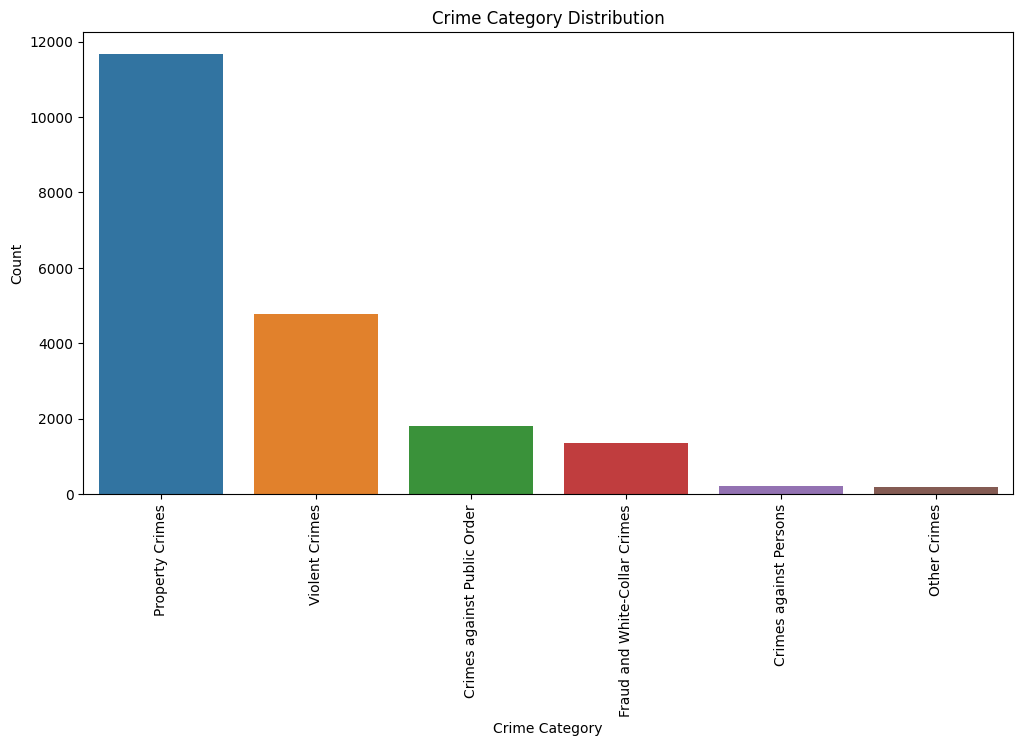

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Crime_Category', data=train_df, order=train_df['Crime_Category'].value_counts().index)
plt.title('Crime Category Distribution')
plt.xlabel('Crime Category')
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.show()

# Crimes Over Time

/tmp/ipykernel_33/4119041105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'])


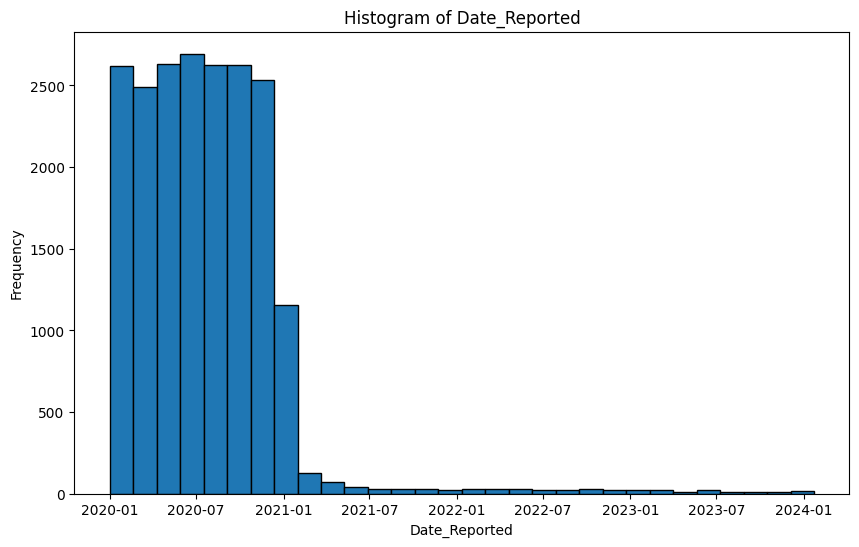

In [7]:
# Convert Date_Reported to datetime
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'])

plt.figure(figsize=(10, 6))
train_df['Date_Reported'].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of Date_Reported')
plt.xlabel("Date_Reported")
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


# Crime Categories by Area

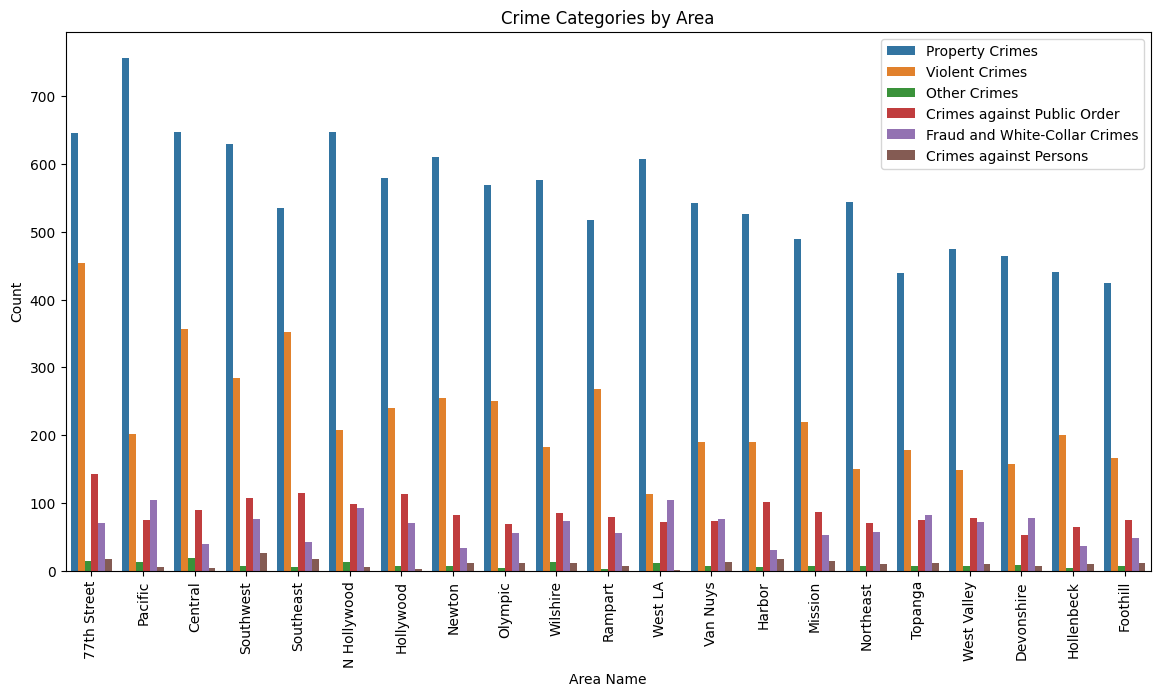

In [8]:
# Plot the distribution of Crime_Category by Area_Name
plt.figure(figsize=(14, 7))
sns.countplot(x='Area_Name', hue='Crime_Category', data=train_df, order=train_df['Area_Name'].value_counts().index)
plt.title('Crime Categories by Area')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


# Crime Categories by Victim Sex


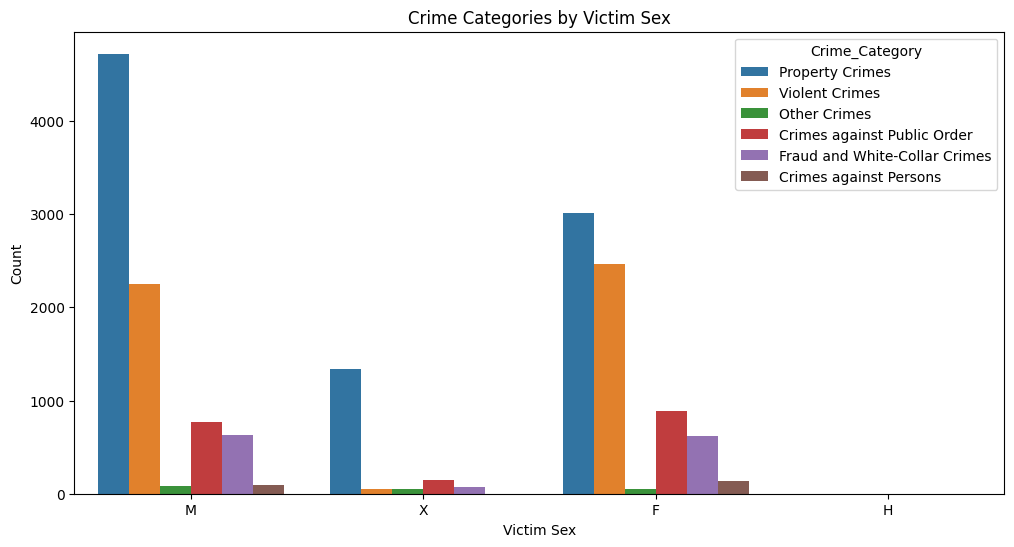

In [9]:
# Plot the distribution of Crime_Category by Victim_Sex
plt.figure(figsize=(12, 6))
sns.countplot(x='Victim_Sex', hue='Crime_Category', data=train_df)
plt.title('Crime Categories by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()


# Crime by victim Age

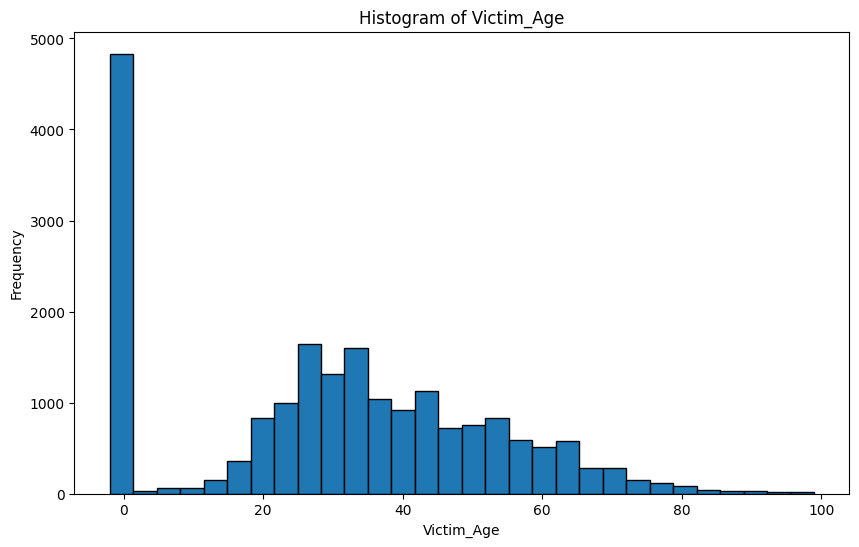

In [10]:
plt.figure(figsize=(10, 6))
train_df['Victim_Age'].hist(bins=30, edgecolor='black')
plt.title(f'Histogram of Victim_Age')
plt.xlabel('Victim_Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


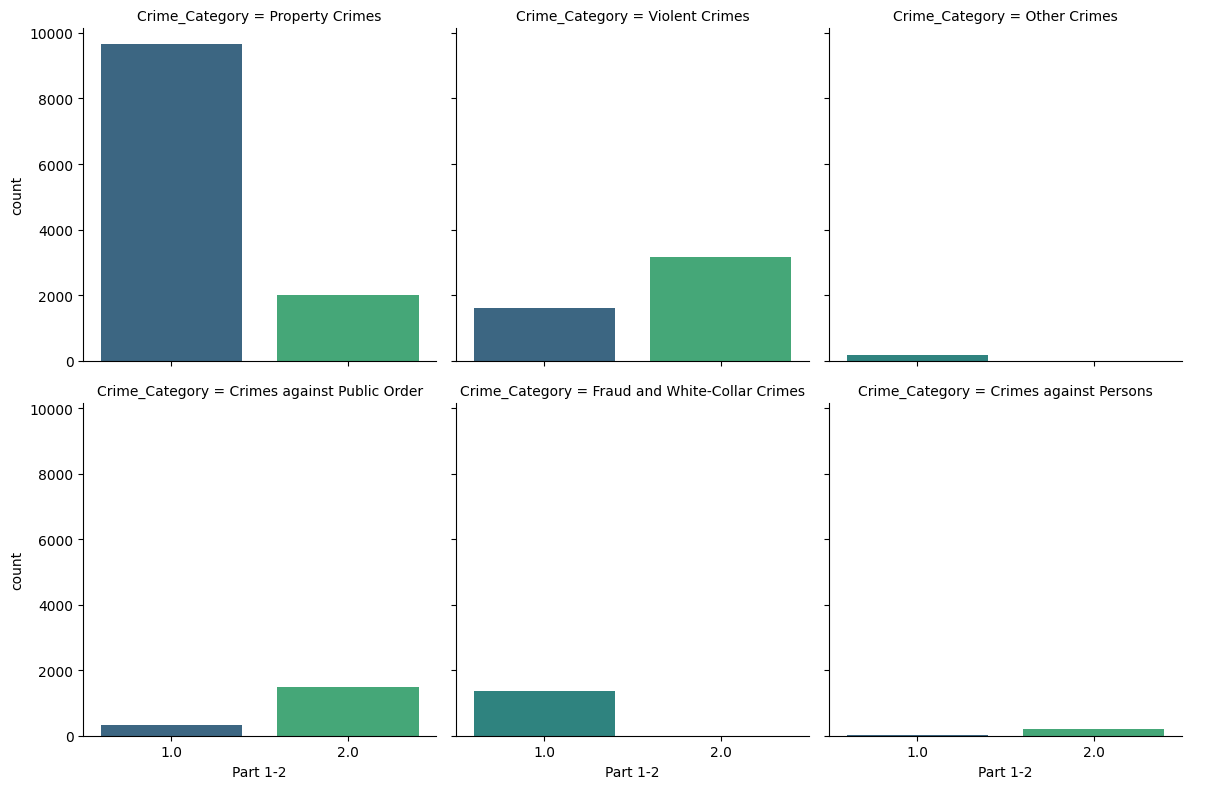# Crimes by Part 1-2 Classification

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


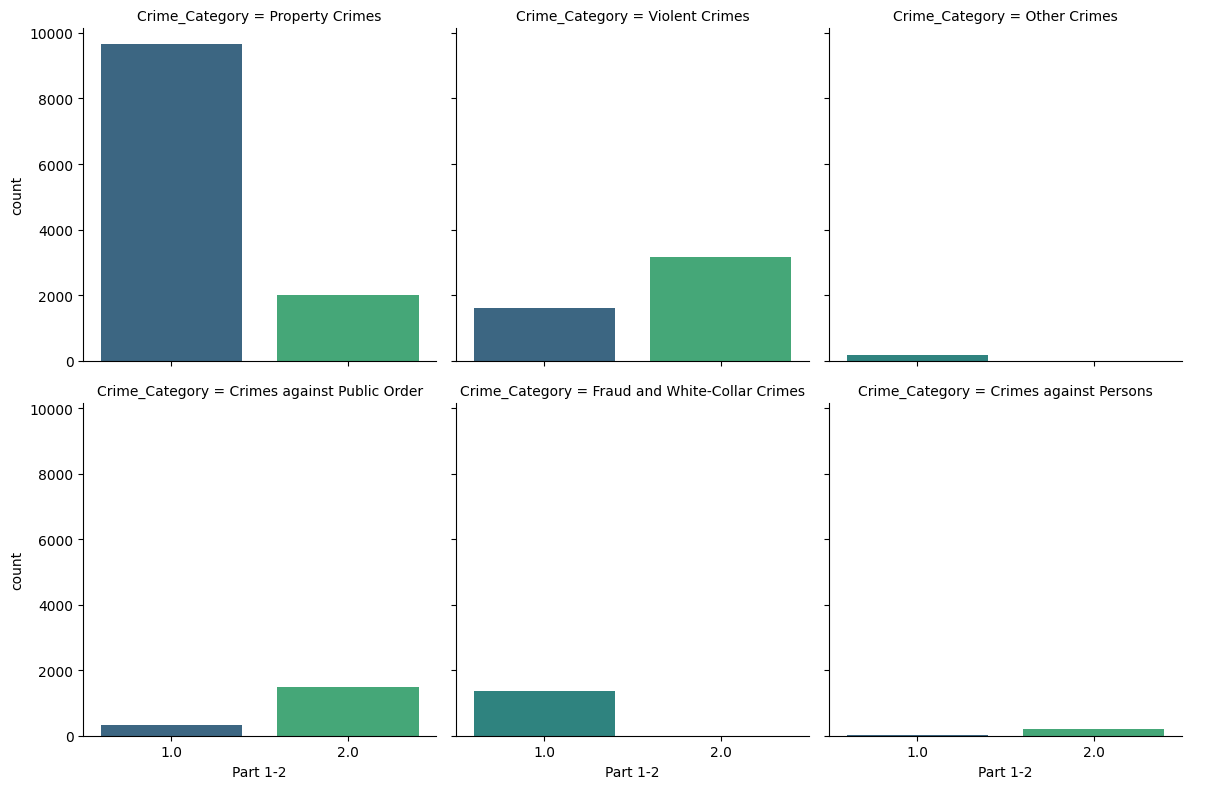

In [11]:
g = sns.FacetGrid(train_df, col='Crime_Category', col_wrap=3, height=4)
g.map(sns.countplot, 'Part 1-2', palette='viridis')
g.add_legend()
plt.show()

# Heatmap of Crimes by Location

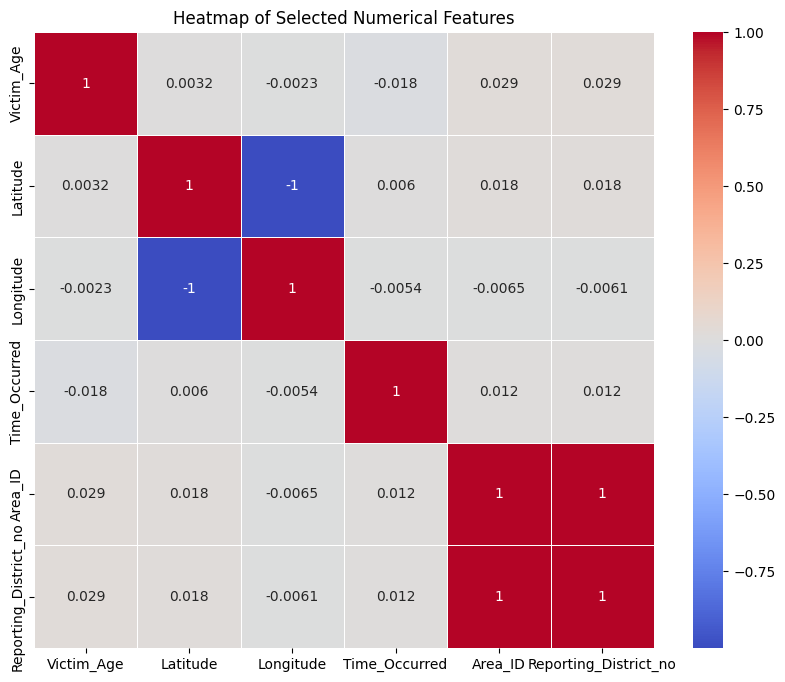

In [12]:
# Select columns for heatmap
selected_columns = ['Victim_Age', 'Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no']

# Create correlation matrix
correlation_matrix = train_df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#annot=True: Displays numerical data values within the heatmap cells.
#cmap='coolwarm': Sets the color scheme of the heatmap to transition from blue (cool) to red (warm).
#linewidths=0.5: Specifies the width of the lines separating the cells in the heatmap.
plt.title('Heatmap of Selected Numerical Features')
plt.show()


# Crimes by Premise Description

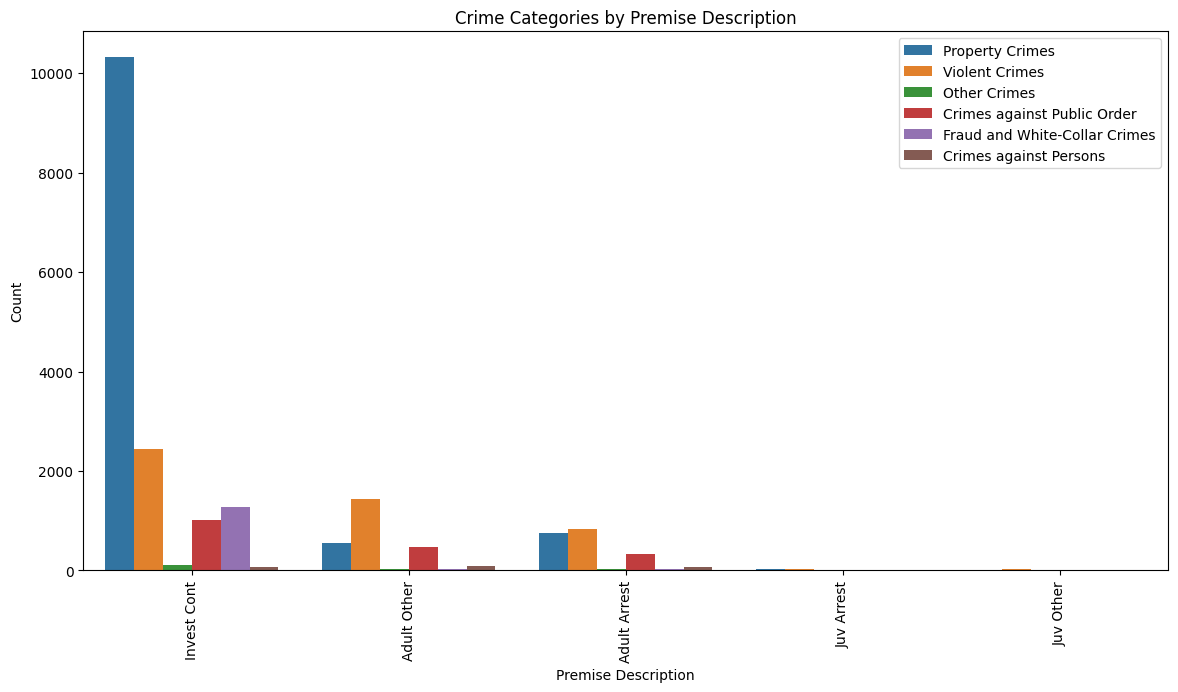

In [13]:
# Plot the distribution of Crime_Category by Premise_Description
plt.figure(figsize=(14, 7))
sns.countplot(x='Status_Description', hue='Crime_Category', data=train_df, order=train_df['Status_Description'].value_counts().index)
plt.title('Crime Categories by Premise Description')
plt.xlabel('Premise Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


# Data preprocessing

In [14]:
# Convert date columns to datetime format
train_df["Date_Reported"] = pd.to_datetime(train_df["Date_Reported"])
train_df["Date_Occurred"] = pd.to_datetime(train_df["Date_Occurred"])

# Extract year, month, day from Date_Reporte
train_df['Day_Reported'] = train_df['Date_Reported'].dt.day
train_df['Month_Reported'] = train_df['Date_Reported'].dt.month
train_df['Year_Reported'] = train_df['Date_Reported'].dt.year

# Extract year, month, day from Date_Occurred
train_df['Day_Occurred'] = train_df['Date_Occurred'].dt.day
train_df['Month_Occurred'] = train_df['Date_Occurred'].dt.month
train_df['Year_Occurred'] = train_df['Date_Occurred'].dt.year

# Drop the original date columns
train_df = train_df.drop(columns=['Date_Reported', 'Date_Occurred'])


/tmp/ipykernel_33/3558238365.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["Date_Occurred"] = pd.to_datetime(train_df["Date_Occurred"])


In [15]:
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Weapon_Description,Status,Status_Description,Crime_Category,Day_Reported,Month_Reported,Year_Reported,Day_Occurred,Month_Occurred,Year_Occurred
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,1800.0,15.0,N Hollywood,1563.0,1.0,0385,...,NaN,IC,Invest Cont,Property Crimes,9,3,2020,6,3,2020
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,27,2,2020,27,2,2020
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,605.0,13.0,Newton,1343.0,2.0,0329 1202,...,NaN,IC,Invest Cont,Property Crimes,21,8,2020,21,8,2020
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,1800.0,19.0,Mission,1924.0,1.0,0329 1300,...,NaN,IC,Invest Cont,Property Crimes,8,11,2020,6,11,2020
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,25,2,2020,25,2,2020


In [16]:
# Convert date columns to datetime format
test_df["Date_Reported"] = pd.to_datetime(test_df["Date_Reported"])
test_df["Date_Occurred"] = pd.to_datetime(test_df["Date_Occurred"])

# Extract year, month, day from Date_Reporte
test_df['Day_Reported'] = test_df['Date_Reported'].dt.day
test_df['Month_Reported'] = test_df['Date_Reported'].dt.month
test_df['Year_Reported'] = test_df['Date_Reported'].dt.year

# Extract year, month, day from Date_Occurred
test_df['Day_Occurred'] = test_df['Date_Occurred'].dt.day
test_df['Month_Occurred'] = test_df['Date_Occurred'].dt.month
test_df['Year_Occurred'] = test_df['Date_Occurred'].dt.year

# Drop the original date columns
test_df = test_df.drop(columns=['Date_Reported', 'Date_Occurred'])


/tmp/ipykernel_33/510898397.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["Date_Reported"] = pd.to_datetime(test_df["Date_Reported"])
/tmp/ipykernel_33/510898397.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["Date_Occurred"] = pd.to_datetime(test_df["Date_Occurred"])


In [17]:
test_df.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Day_Reported,Month_Reported,Year_Reported,Day_Occurred,Month_Occurred,Year_Occurred
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,3,3,2020,3,3,2020
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,...,NaN,NaN,IC,Invest Cont,1,6,2020,25,4,2020
2,300 E 111TH ST,NaN,33.9348,-118.2695,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,...,NaN,NaN,IC,Invest Cont,28,8,2020,27,8,2020
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,2200.0,7.0,Wilshire,765.0,1.0,NaN,...,NaN,NaN,IC,Invest Cont,23,12,2020,3,12,2020
4,11000 MORRISON ST,NaN,34.1611,-118.3704,130.0,15.0,N Hollywood,1555.0,2.0,1501,...,NaN,NaN,AO,Adult Other,30,8,2020,29,8,2020


# Feature Engineering

In [18]:

# Convert the 'Time_Occurred' column from HHMM format to just the hour (HH) in the train dataset
train_df["Time_Occurred"] = train_df["Time_Occurred"].apply(lambda time: int(time//100))

# Convert the 'Time_Occurred' column from HHMM format to just the hour (HH) in the test dataset
test_df["Time_Occurred"] = test_df["Time_Occurred"].apply(lambda time: int(time//100))

train_df["Time_Occurred"],test_df["Time_Occurred"]

(0        18
 1        13
 2         6
 3        18
 4        11
          ..
 19995     7
 19996     2
 19997    14
 19998     6
 19999    18
 Name: Time_Occurred, Length: 20000, dtype: int64,
 0       20
 1       17
 2        9
 3       22
 4        1
         ..
 4995    21
 4996    15
 4997    21
 4998    23
 4999     3
 Name: Time_Occurred, Length: 5000, dtype: int64)

In [19]:
train_df.Premise_Description.nunique()

216

In [20]:
train_df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Time_Occurred',
       'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Premise_Description', 'Weapon_Used_Code',
       'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category',
       'Day_Reported', 'Month_Reported', 'Year_Reported', 'Day_Occurred',
       'Month_Occurred', 'Year_Occurred'],
      dtype='object')

In [21]:
# Drop the unused catogorical columns in both train and test dataset
train_df.drop(inplace = True,columns = ['Cross_Street' ,'Weapon_Used_Code', 'Status_Description' , 'Area_ID' , 'Premise_Code'])
test_df.drop(inplace = True,columns = ['Cross_Street' ,'Weapon_Used_Code', 'Status_Description' , 'Area_ID' , 'Premise_Code'])


In [22]:
# Replace invalid ages (-1, -2, 0) with NaN in the 'Victim_Age' column of the train and test dataset
test_df['Victim_Age'] = train_df['Victim_Age'].replace([-1, -2, 0], np.nan)
test_df['Victim_Age'] = test_df['Victim_Age'].replace([-1, -2, 0], np.nan)


In [23]:
# Replace invalid Longitude and Latitude (0) with NaN in train dataset
# train_df['Latitude'].replace(0, np.nan, inplace=True)
# train_df['Longitude'].replace(0, np.nan, inplace=True)

# Replace invalid Longitude and Latitude (0) with NaN in test dataset
# test_df['Latitude'].replace(0, np.nan, inplace=True)
# test_df['Longitude'].replace(0, np.nan, inplace=True)

# alternative
train_df.replace({'Latitude': {0: np.nan}, 'Longitude': {0: np.nan}}, inplace=True)
test_df.replace({'Latitude': {0: np.nan}, 'Longitude': {0: np.nan}}, inplace=True)


# Pipelining

In [24]:
# Pipeline to impute missing values in 'Longitude' and 'Latitude' with the mean and then scale these features
ppl_longitude_latitude = Pipeline(steps=[("longitude_latitude_imputer",SimpleImputer(strategy="mean")),
                                         ("latitude_longitude_scaler",StandardScaler())])

# Pipeline to impute missing values in 'Victim_Age' with the most frequent value and then scale this feature
ppl_age = Pipeline(steps = [("age_imputer" , SimpleImputer(strategy="most_frequent")),
                            ("age_scaler" , StandardScaler())])

# Pipeline to one-hot encode the 'Area_ID' and 'Part 1-2' features, handling unknown categories by ignoring them
ppl_Area_ID_Part_12_status = Pipeline(steps = [("area_id_part_12_status_encoder", OneHotEncoder(handle_unknown='ignore'))])

# Pipeline to impute missing values in 'Victim_Sex' and 'Victim_Descent' with the most frequent value and then one-hot encode these features
ppl_sex_descent = Pipeline(steps = [("sex_descent_imputer" , SimpleImputer(strategy="most_frequent")),
                                    ("sex_descent_encoder" , OneHotEncoder(handle_unknown='ignore'))])

# Pipeline to binary encode the 'Weapon_Used_Code' and 'Premise_Description' features
ppl_weapon_premise_code = Pipeline(steps = [("weapon_premise_code_encoder", BinaryEncoder())])

# ppl_Modus_opperandi = Pipeline(steps = [(SimpleImputer(strategy='most_frequent'),)])
# ppl_status = Pipeline(steps = [("status_encoder" , OneHotEncoder(handle_unknown='ignore'))])
# ppl_Part_12 = Pipeline(steps=["part12_encoder",OneHotEncoder(handle_unknown='ignore')])
# ppl_premis_code = Pipeline(steps = [("premis_code_imputer" , SimpleImputer(stratergy="most_frequent")),("premise_code_scaler", StandardScaler())])

# ColumnTransformer

In [25]:
# Define a list of columns that will remain unchanged during preprocessing
pass_these = ['Time_Occurred','Year_Reported','Month_Reported','Day_Reported','Year_Occurred','Month_Occurred','Day_Occurred']

# Define a ColumnTransformer for preprocessing
preprocessing = ColumnTransformer([
    ("unchanged_columns",FunctionTransformer(lambda x:x), pass_these),    # Pass-through transformer for columns that should remain unchanged

    ("latitude_longitude",ppl_longitude_latitude,["Latitude","Longitude"]),    # Pipeline for imputing and scaling 'Latitude' and 'Longitude' columns

    ("victim_age",ppl_age,["Victim_Age"]),    # Pipeline for imputing and scaling 'Victim_Age' column

    ("area_id_part_12_status",ppl_Area_ID_Part_12_status,["Area_Name","Part 1-2","Status"]),    # Pipeline for encoding 'Area_ID', 'Part 1-2', and 'Status' columns

    ("victim_sex_descent",ppl_sex_descent,["Victim_Sex" , "Victim_Descent"]),    # Pipeline for imputing and encoding 'Victim_Sex' and 'Victim_Descent' columns

    ("weapon_premise_code",ppl_weapon_premise_code,["Premise_Description" , "Weapon_Description"]),    # Pipeline for encoding 'Premise_Code' and 'Weapon_Used_Code' columns

],remainder="drop")     # Drop any columns not specified in the transformers
preprocessing

ColumnTransformer(transformers=[('unchanged_columns',
                                 FunctionTransformer(func=<function <lambda> at 0x7b153fd00d30>),
                                 ['Time_Occurred', 'Year_Reported',
                                  'Month_Reported', 'Day_Reported',
                                  'Year_Occurred', 'Month_Occurred',
                                  'Day_Occurred']),
                                ('latitude_longitude',
                                 Pipeline(steps=[('longitude_latitude_imputer',
                                                  SimpleImputer()),
                                                 ('latitude_longitude_scaler',
                                                  Standar...
                                 ['Area_Name', 'Part 1-2', 'Status']),
                                ('victim_sex_descent',
                                 Pipeline(steps=[('sex_descent_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('sex_descent_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Victim_Sex', 'Victim_Descent']),
                                ('weapon_premise_code',
                                 Pipeline(steps=[('weapon_premise_code_encoder',
                                                  BinaryEncoder())]),
                                 ['Premise_Description',
                                  'Weapon_Description'])])

In [26]:
train_df.columns

Index(['Location', 'Latitude', 'Longitude', 'Time_Occurred', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Description',
       'Weapon_Description', 'Status', 'Crime_Category', 'Day_Reported',
       'Month_Reported', 'Year_Reported', 'Day_Occurred', 'Month_Occurred',
       'Year_Occurred'],
      dtype='object')

In [27]:
# Impute missing values in 'Modus_Operandi' column with the most frequent value
modus_op_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Modus_Operandi' column in the training dataset
# The fit_transform method fits the imputer on the training data and transforms it in one step
train_df['Modus_Operandi'] = modus_op_imputer.fit_transform(train_df[['Modus_Operandi']]).flatten()

# Apply the imputer to the 'Modus_Operandi' column in the test dataset
# The transform method only transforms the test data based on the fitted imputer from the training data
test_df['Modus_Operandi'] = modus_op_imputer.transform(test_df[['Modus_Operandi']]).flatten()

In [28]:
Location_Modus = ColumnTransformer(transformers = [
    # The CountVectorizer converts the text data into a matrix of token counts
    ("location_vectorizer", CountVectorizer() , "Location"),
    ("Modus_vectorizer", CountVectorizer() , "Modus_Operandi")
])

In [29]:
combined_preprocessor = ColumnTransformer([
    ('location_modus' , Location_Modus , ['Location' , 'Modus_Operandi']),
    ("Preprocessor" , preprocessing , [ "Year_Reported","Month_Reported","Day_Reported","Year_Occurred","Month_Occurred","Day_Occurred",
                                        'Time_Occurred',"Latitude" , "Longitude","Area_Name" ,"Part 1-2" , "Victim_Age" ,"Victim_Sex" , 
                                         "Victim_Descent" , "Premise_Description" , "Weapon_Description" , "Status"])
])

# MODELS

## 1) XGBoost

In [30]:
model_score = []

# the final pipeline using XGBClassifier
XGBoost_final_pipeline = Pipeline(steps = [
    ("combined_preprocessor" , combined_preprocessor),    # Combine all preprocessing steps
    ('xgboost', XGBClassifier(eval_metric='mlogloss'))    # Apply the XGBoost classifier
])

# Define the parameter grid for hyperparameter tuning
XGBoost_param_grid = {
    'xgboost__n_estimators': [100, 200, 300],          # Number of boosting rounds
    'xgboost__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate for boosting
    'xgboost__max_depth': [3, 4, 5, 6, 7],             # Maximum tree depth for base learners
    'xgboost__min_child_weight': [1, 3, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'xgboost__gamma': [0, 0.1, 0.2, 0.3],              # Minimum loss reduction required to make a further partition
    'xgboost__subsample': [0.7, 0.8, 0.9, 1.0],        # Subsample ratio of the training instances
}

In [31]:
# Configure RandomizedSearchCV to perform hyperparameter tuning
XGBoost_random_search = RandomizedSearchCV(
    XGBoost_final_pipeline,                  # The pipeline to optimize
    param_distributions=XGBoost_param_grid,  # The parameter grid to sample from
    n_iter=50,                  # Number of parameter settings that are sampled
    scoring='accuracy',         # The scoring metric to evaluate the models
    n_jobs=-1,                  # Use all available CPU cores
    cv=3,                       # 3-fold cross-validation
    verbose=2,                  # Print detailed information during the search
    random_state=42             # Fix the random state for reproducibility
)

In [32]:
train_df.columns


Index(['Location', 'Latitude', 'Longitude', 'Time_Occurred', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Description',
       'Weapon_Description', 'Status', 'Crime_Category', 'Day_Reported',
       'Month_Reported', 'Year_Reported', 'Day_Occurred', 'Month_Occurred',
       'Year_Occurred'],
      dtype='object')

In [33]:
X = train_df.drop('Crime_Category', axis=1)
y = train_df['Crime_Category']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
XGBoost_random_search.fit(X_train , y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
best_model = XGBoost_random_search.best_estimator_

In [ ]:
# The model outputs predicted labels for each instance in test_df
y_pred = best_model.predict(test_df)

# The inverse_transform method of the LabelEncoder is used to map numerical labels back to original categories
y_pred = label_encoder.inverse_transform(y_pred)

In [ ]:
# Print the best parameters and best score
print(f'Best parameters of XGBoost: {XGBoost_random_search.best_params_ }')
print(f'Best accuracy by XGBoost: {XGBoost_random_search.best_score_:.4f}')
model_score.append(XGBoost_random_search.best_score_)

In [ ]:
# Create a DataFrame for the submission with 'ID' and predicted 'Crime_Category'
submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_pred,
                          }
                         )
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
print(submission)

In [ ]:
FileLink('submission.csv')


# RandomForestClassifier

In [ ]:
# final pipeline using RandomForestClassifier
RandomForest_final_pipeline = Pipeline(steps=[
    ("combined_preprocessor", combined_preprocessor),    # Combine all preprocessing steps
    ('random_forest', RandomForestClassifier())    # Apply the RandomForest classifier
])

RandomForest_param_grid = {
    'random_forest__n_estimators': [100, 200, 300, 400, 500],   # Number of trees in the forest
    'random_forest__max_depth': [None, 10, 20, 30, 40, 50],     # Maximum number of levels in each tree
    'random_forest__min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'random_forest__min_samples_leaf': [1, 2, 4],               # Minimum number of samples required at each leaf node
}

In [ ]:
# Configure RandomizedSearchCV to perform hyperparameter tuning
RandomForest_random_search = RandomizedSearchCV(
    RandomForest_final_pipeline,                  # The pipeline to optimize
    param_distributions=RandomForest_param_grid,  # The parameter grid to sample from
    n_iter=50,                  # Number of parameter settings that are sampled
    scoring='accuracy',         # The scoring metric to evaluate the models
    n_jobs=-1,                  # Use all available CPU cores
    cv=3,                       # 3-fold cross-validation
    verbose=2,                  # Print detailed information during the search
    random_state=42             # Fix the random state for reproducibility
)

In [ ]:
RandomForest_random_search.fit(X_train, y_train)

In [43]:
best_model = RandomForest_random_search.best_estimator_

In [44]:
# The model outputs predicted labels for each instance in test_df
y_pred = best_model.predict(test_df)

# The inverse_transform method of the LabelEncoder is used to map numerical labels back to original categories
# Decode the predicted and true labels
y_pred = label_encoder.inverse_transform(y_test)

In [45]:
# Get the best parameters and best score from RandomizedSearchCV
print(f'Best parameters of RandomizedSearchCV: {RandomForest_random_search.best_params_}')
print(f'Best accuracy by RandomizedSearchCV: {RandomForest_random_search.best_score_:.4f}')
model_score.append(RandomForest_random_search.best_score_)

Best parameters of RandomizedSearchCV: {'random_forest__n_estimators': 300, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 1, 'random_forest__max_depth': 50}
Best accuracy by RandomizedSearchCV: 0.9326


In [46]:
# Suppress LightGBM warnings
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')

# LGBMClassifier

In [47]:
# the final pipeline using LGBMClassifier
LGBMClassifier_final_pipeline = Pipeline(steps=[
    ("combined_preprocessor", combined_preprocessor),
    ('lightgbm', LGBMClassifier())
])

LGBMClassifier_param_grid = {
    'lightgbm__n_estimators': [100, 200, 300, 400, 500],          # Number of boosting iterations
    'lightgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],            # Boosting learning rate
    'lightgbm__num_leaves': [31, 50, 70, 100],                    # Maximum tree leaves for base learners
    'lightgbm__max_depth': [-1, 10, 20, 30, 40],                  # Maximum tree depth for base learners
    'lightgbm__min_child_samples': [20, 30, 40, 50],              # Minimum number of data points in a leaf
    'lightgbm__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],             # Subsample ratio of the training instances
    'lightgbm__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],      # Subsample ratio of columns when constructing each tree
    'lightgbm__reg_alpha': [0, 0.01, 0.1, 1],                     # L1 regularization term on weights
    'lightgbm__reg_lambda': [0, 0.01, 0.1, 1]                     # L2 regularization term on weights
}

In [48]:
# Configure RandomizedSearchCV to perform hyperparameter tuning
LGBMClassifier_random_search = RandomizedSearchCV(
    LGBMClassifier_final_pipeline,                  # The pipeline to optimize
    param_distributions=LGBMClassifier_param_grid,  # The parameter grid to sample from
    n_iter=50,                  # Number of parameter settings that are sampled
    scoring='accuracy',         # The scoring metric to evaluate the models
    n_jobs=-1,                  # Use all available CPU cores
    cv=3,                       # 3-fold cross-validation
    verbose=2,                  # Print detailed information during the search
    random_state=42             # Fix the random state for reproducibility
)

In [ ]:
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')

LGBMClassifier_random_search.fit(X_train, y_train)

In [51]:
best_model = LGBMClassifier_random_search.best_estimator_

In [53]:
# Predict and prepare the submission file
y_pred = best_model.predict(test_df)
y_pred = label_encoder.inverse_transform(y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
# Create a DataFrame for the submission with 'ID' and predicted 'Crime_Category'
submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_pred,
                          }
                         )
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
print(submission)

In [54]:
# Get the best parameters and best score from RandomizedSearchCV
print(f'Best parameters of LGBMClassifier: {LGBMClassifier_random_search.best_params_}')
print(f'Best accuracy by LGBMClassifier: {LGBMClassifier_random_search.best_score_:.4f}')
model_score.append(LGBMClassifier_random_search.best_score_)

Best parameters of LGBMClassifier: {'lightgbm__subsample': 0.9, 'lightgbm__reg_lambda': 1, 'lightgbm__reg_alpha': 0.01, 'lightgbm__num_leaves': 31, 'lightgbm__n_estimators': 200, 'lightgbm__min_child_samples': 20, 'lightgbm__max_depth': 40, 'lightgbm__learning_rate': 0.2, 'lightgbm__colsample_bytree': 0.6}
Best accuracy by LGBMClassifier: 0.9534


# Comparison of models

In [55]:
# Score of each of the models
model_names = ['XGboost', 'RandomForest', 'LightGBM']
for i in range(3):
    print(model_names[i],":",model_score[i])

XGboost : 0.9534374957302473
RandomForest : 0.9325625854053073
LightGBM : 0.953437554320336


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


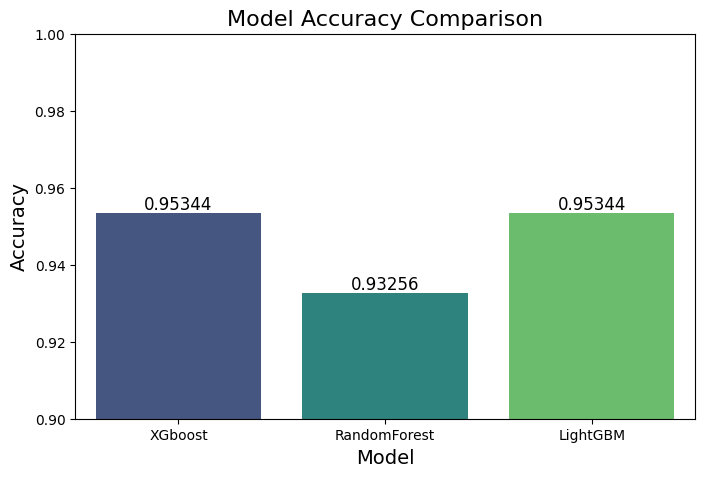

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [56]:

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_score, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Set the y-axis limit for better visualization

# Annotate each bar with the accuracy score
for i, score in enumerate(model_score):
    plt.text(i, score + 0.001, f'{score:.5f}', ha='center', fontsize=12)

# Show the plot
plt.show()
